# Objective

Explore how the number of complaints vary over time. Are there certain periods with higher complaint vloumes or least complaint volumes?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## Uploading dataset which is in json format

In [2]:
# Using pandas read_json function to upload dataset

df = pd.read_json('complaints.json')

# Showing the first 10 rows of dataset

df.head(10)

,date_received,product,sub_product,issue,sub_issue,complaint_what_happened,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed,complaint_id
0,2023-12-01,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,91765,,,Web,2023-12-01,In progress,Yes,N/A,7936528
1,2023-12-01,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Personal information incorrect,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85353,,,Web,2023-12-01,In progress,Yes,N/A,7936521
2,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,,,Experian Information Solutions Inc.,NC,27103,,,Web,2023-11-18,In progress,Yes,N/A,7870088
3,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,,,Experian Information Solutions Inc.,TX,761XX,,,Web,2023-11-18,In progress,Yes,N/A,7867568
4,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,,,Experian Information Solutions Inc.,NJ,07513,,,Web,2023-11-18,In progress,Yes,N/A,7867486
5,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,,,Experian Information Solutions Inc.,CA,91724,,Other,Web,2023-11-18,In progress,Yes,N/A,7867484
6,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,,,Experian Information Solutions Inc.,FL,33063,,,Web,2023-11-18,In progress,Yes,N/A,7867459
7,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,,,Experian Information Solutions Inc.,CA,91724,,Other,Web,2023-11-18,In progress,Yes,N/A,7867447
8,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,,,Experian Information Solutions Inc.,CA,91601,,,Web,2023-11-18,In progress,Yes,N/A,7867442
9,2023-11-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,,,Experian Information Solutions Inc.,FL,335XX,,,Web,2023-11-18,In progress,Yes,N/A,7867691


## Exploring & Cleaning Dataset

In [3]:
# Checking the shape of dataset

df.shape

(4370188, 18)

In [4]:
# Checking the column names and their datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370188 entries, 0 to 4370187
Data columns (total 18 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   date_received              object
 1   product                    object
 2   sub_product                object
 3   issue                      object
 4   sub_issue                  object
 5   complaint_what_happened    object
 6   company_public_response    object
 7   company                    object
 8   state                      object
 9   zip_code                   object
 10  tags                       object
 11  consumer_consent_provided  object
 12  submitted_via              object
 13  date_sent_to_company       object
 14  company_response           object
 15  timely                     object
 16  consumer_disputed          object
 17  complaint_id               int64 
dtypes: int64(1), object(17)
memory usage: 600.2+ MB


In [5]:
# Converting Date_received and date_sent_to_company into datetime format & complaint_id to String datatype

df['date_received'] = pd.to_datetime(df['date_received'])
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'])
df['complaint_id'] = df['complaint_id'].astype(object)

# Checking again for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370188 entries, 0 to 4370187
Data columns (total 18 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_received              datetime64[ns]
 1   product                    object        
 2   sub_product                object        
 3   issue                      object        
 4   sub_issue                  object        
 5   complaint_what_happened    object        
 6   company_public_response    object        
 7   company                    object        
 8   state                      object        
 9   zip_code                   object        
 10  tags                       object        
 11  consumer_consent_provided  object        
 12  submitted_via              object        
 13  date_sent_to_company       datetime64[ns]
 14  company_response           object        
 15  timely                     object        
 16  consumer_disputed          object   

In [6]:
# Exploring dataset by using describe function for all columns

df.describe(include = 'all', datetime_is_numeric = 'True')

,date_received,product,sub_product,issue,sub_issue,complaint_what_happened,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed,complaint_id
count,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188,4370188.0
unique,NaN,21,87,177,273,1324477,12,7059,64,33223,4,6,7,NaN,9,2,3,4370188.0
top,NaN,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,,,"EQUIFAX, INC.",FL,XXXXX,,Consent not provided,Web,NaN,Closed with explanation,Yes,N/A,7936528.0
freq,NaN,2163891,2435066,1177667,777889,2782289,2309591,854297,512554,106751,3926767,1685500,3836598,NaN,3105791,4315175,3601833,1.0
mean,2020-07-16 07:38:22.210523648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-17 18:51:23.536726528,NaN,NaN,NaN,NaN
min,2011-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01 00:00:00,NaN,NaN,NaN,NaN
25%,2018-07-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-27 00:00:00,NaN,NaN,NaN,NaN
50%,2021-07-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-19 00:00:00,NaN,NaN,NaN,NaN
75%,2023-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23 00:00:00,NaN,NaN,NaN,NaN
max,2023-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-03 00:00:00,NaN,NaN,NaN,NaN


In [7]:
# Removing the duplicate rows from dataset if any 

df.drop_duplicates(inplace = True)

In [8]:
# Checking the shape of dataset after removing duplicates

df.shape

(4370188, 18)

Shape of dataset reamains same. It suggest that dataset has no duplicate records.

In [9]:
# Checking Number of Null Values for each column


null_counts = df.isnull().sum()

print('Number of null values for each column:')
print(null_counts)

Number of null values for each column:
date_received                0
product                      0
sub_product                  0
issue                        0
sub_issue                    0
complaint_what_happened      0
company_public_response      0
company                      0
state                        0
zip_code                     0
tags                         0
consumer_consent_provided    0
submitted_via                0
date_sent_to_company         0
company_response             0
timely                       0
consumer_disputed            0
complaint_id                 0
dtype: int64


##### Observations:- 

- The dataset has no Null or Duplicate Values
- We have around 43.7 Millions Records and 18 Columns in this dataset
- The dataset has no Null or Duplicate Values
- Complaint id can be considered as primary key for this dataset
- Mostly of the complaints (around 24 Millions) are related to Credit Reporting
- Most of the complaints (around 854K) are against the company called Equifax Inc.
- The range of dataset is 2011-12-01 to 2023-12-03

## Filtering Data as per the need of objective

In [10]:
# Creating a New Table with Date and Number of Complaints

df_by_date = df[('date_received')].value_counts().reset_index()
df_by_date.columns = ['Date', 'Number_of_complaints']

# Showing the first 10 Records
df_by_date.head(10)

,Date,Number_of_complaints
0,2023-11-09,5188
1,2023-09-20,5162
2,2023-10-11,5141
3,2023-11-07,5135
4,2023-11-08,5093
5,2023-10-10,5065
6,2023-10-12,5022
7,2023-08-08,5010
8,2023-10-18,4985
9,2023-08-10,4978


In [11]:
df_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4384 non-null   datetime64[ns]
 1   Number_of_complaints  4384 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 68.6 KB


A new dataset df_by_date has been created that will be used for performing further analysis

In [12]:
# Sorting the data from oldest to latest complaints received

df_by_date = df_by_date.sort_values(by = 'Date', ascending = True).reset_index(drop = True)

In [13]:
# Checking the first 10 Rows of sorted complaint_day_wise DataFrame

df_by_date.head(10)

,Date,Number_of_complaints
0,2011-12-01,120
1,2011-12-02,138
2,2011-12-03,26
3,2011-12-04,22
4,2011-12-05,164
5,2011-12-06,170
6,2011-12-07,100
7,2011-12-08,166
8,2011-12-09,68
9,2011-12-10,36


In [14]:
# Checking the last 10 Rows of sorted complaint_day_wise DataFrame

df_by_date.tail(10)

,Date,Number_of_complaints
4374,2023-11-24,2077
4375,2023-11-25,1373
4376,2023-11-26,1014
4377,2023-11-27,1917
4378,2023-11-28,2709
4379,2023-11-29,2962
4380,2023-11-30,2572
4381,2023-12-01,2196
4382,2023-12-02,611
4383,2023-12-03,27


In [15]:
# Adding new columns to df_by_date Dataframe

df_by_date['Month'] = df_by_date['Date'].dt.month
df_by_date['Month_txt'] = df_by_date['Date'].dt.strftime('%b')
df_by_date['Month-Year'] = df_by_date['Date'].dt.strftime('%b-%y')
df_by_date['Year'] = df_by_date['Date'].dt.year
df_by_date['Quarter'] = df_by_date['Date'].dt.quarter
df_by_date['Quarter-Year'] = df_by_date['Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df_by_date['Day'] = df_by_date['Date'].dt.day_name().str.slice(stop = 3)

In [16]:
# Showing the first five rows

df_by_date.head()

,Date,Number_of_complaints,Month,Month_txt,Month-Year,Year,Quarter,Quarter-Year,Day
0,2011-12-01,120,12,Dec,Dec-11,2011,4,2011-Q4,Thu
1,2011-12-02,138,12,Dec,Dec-11,2011,4,2011-Q4,Fri
2,2011-12-03,26,12,Dec,Dec-11,2011,4,2011-Q4,Sat
3,2011-12-04,22,12,Dec,Dec-11,2011,4,2011-Q4,Sun
4,2011-12-05,164,12,Dec,Dec-11,2011,4,2011-Q4,Mon


In [17]:
# Checking the datatypes of columns

df_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4384 non-null   datetime64[ns]
 1   Number_of_complaints  4384 non-null   int64         
 2   Month                 4384 non-null   int64         
 3   Month_txt             4384 non-null   object        
 4   Month-Year            4384 non-null   object        
 5   Year                  4384 non-null   int64         
 6   Quarter               4384 non-null   int64         
 7   Quarter-Year          4384 non-null   object        
 8   Day                   4384 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 308.4+ KB


In [18]:
# Converting Month, Year and Quarter to string datatype 

df_by_date['Month'] = df_by_date['Month'].astype(object)
df_by_date['Year'] = df_by_date['Year'].astype(object)
df_by_date['Quarter'] = df_by_date['Quarter'].astype(object)

In [19]:
# Grouping Number of complaints by Day of week 

df_by_day = df_by_date.groupby('Day')['Number_of_complaints'].sum().reset_index()
df_by_day.columns = ['Day', 'No of Complaints']
df_by_day

,Day,No of Complaints
0,Fri,699887
1,Mon,690062
2,Sat,356499
3,Sun,282156
4,Thu,760900
5,Tue,789644
6,Wed,791040


Given the challenges in readability, let's introduce a new column with formatted numbers to enhance clarity in understanding the complaint data.

In [20]:

# Define a function to convert numbers to thousands

def convert_to_thousand(number):
    return f'{number / 1000:.0f}K'

# Apply the defined function to the 'No of Complaints' column
df_by_day['Complaints_thousand'] = df_by_day['No of Complaints'].apply(convert_to_thousand)

# Define the order of days
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert the 'Day' column to a categorical type with the specified order
df_by_day['Day'] = pd.Categorical(df_by_day['Day'], categories=day_order, ordered=True)

# Sort the DataFrame by the 'Day' column
df_by_day = df_by_day.sort_values(by='Day')

print(df_by_day)


   Day  No of Complaints Complaints_thousand
1  Mon            690062                690K
5  Tue            789644                790K
6  Wed            791040                791K
4  Thu            760900                761K
0  Fri            699887                700K
2  Sat            356499                356K
3  Sun            282156                282K


In [21]:
# Checking the datatype of compplaints_day_wise dataset

df_by_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 3
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Day                  7 non-null      category
 1   No of Complaints     7 non-null      int64   
 2   Complaints_thousand  7 non-null      object  
dtypes: category(1), int64(1), object(1)
memory usage: 531.0+ bytes


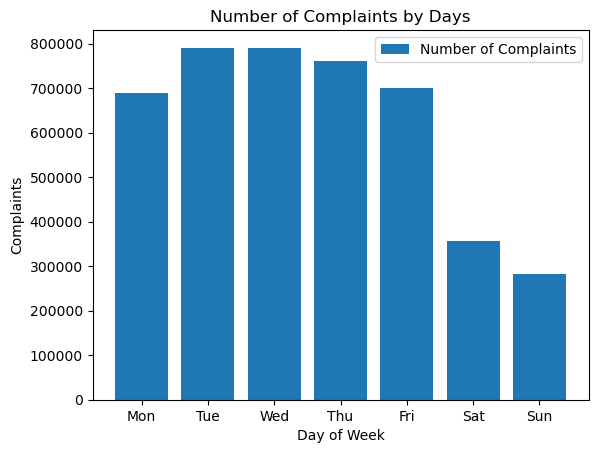

In [22]:
# Visualizing the number of complaints by day using bar chart

plt.bar(x = df_by_day['Day'], height = df_by_day['No of Complaints'], label = 'Number of Complaints')

plt.xlabel("Day of Week")
plt.ylabel("Complaints")
plt.title("Number of Complaints by Days")

plt.legend()
plt.show()

It seems like there is a trend of higher complaint counts towards the middle of the week, with Wednesday and Tuesday having the highest number. The lowest counts are on the weekends, especially on Sunday. 

In [23]:
# Grouping the number of complaints by month

df_by_month = df_by_date.groupby(['Month', 'Month_txt'])['Number_of_complaints'].sum().reset_index()

df_by_month['Complaints_in_thousands'] = df_by_month['Number_of_complaints'].apply(convert_to_thousand)

df_by_month

,Month,Month_txt,Number_of_complaints,Complaints_in_thousands
0,1,Jan,331685,332K
1,2,Feb,310090,310K
2,3,Mar,370084,370K
3,4,Apr,367112,367K
4,5,May,367520,368K
5,6,Jun,370928,371K
6,7,Jul,384818,385K
7,8,Aug,403013,403K
8,9,Sep,388434,388K
9,10,Oct,408609,409K


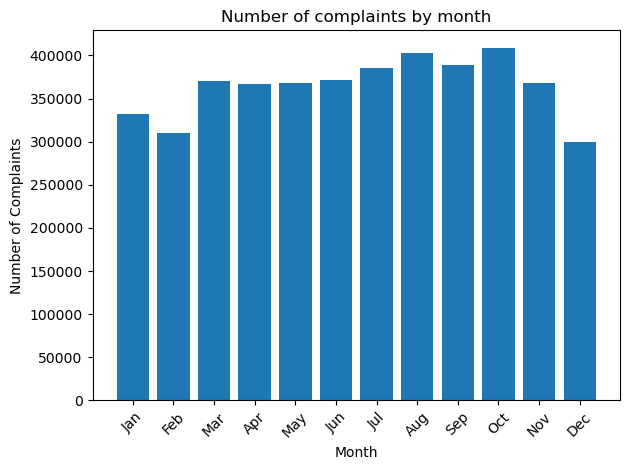

In [24]:
# Creating a Bar Chart


plt.bar(df_by_month['Month_txt'], df_by_month['Number_of_complaints'])
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Number of complaints by month')
plt.xticks(rotation=45) 

plt.tight_layout() 
plt.show()

The data suggests some seasonality, with higher complaint counts during certain months, possibly influenced by external factors or patterns in consumer behavior. 

#### Creating line chart for trend of complaints over months

In [25]:
df_month_year = df_by_date.groupby(['Month','Year', 'Month-Year'])['Number_of_complaints'].sum().reset_index()

df_month_year.head()

,Month,Year,Month-Year,Number_of_complaints
0,1,2012,Jan-12,3230
1,1,2013,Jan-13,9741
2,1,2014,Jan-14,12617
3,1,2015,Jan-15,12626
4,1,2016,Jan-16,13840


In [26]:
# Sorting the values by Year and Month 

df_month_year = df_month_year.sort_values(by= ['Year', 'Month'], ascending = True).reset_index(drop = True)

df_month_year.head(10)

,Month,Year,Month-Year,Number_of_complaints
0,12,2011,Dec-11,2536
1,1,2012,Jan-12,3230
2,2,2012,Feb-12,3509
3,3,2012,Mar-12,6230
4,4,2012,Apr-12,5703
5,5,2012,May-12,7616
6,6,2012,Jun-12,7841
7,7,2012,Jul-12,6755
8,8,2012,Aug-12,6877
9,9,2012,Sep-12,5493


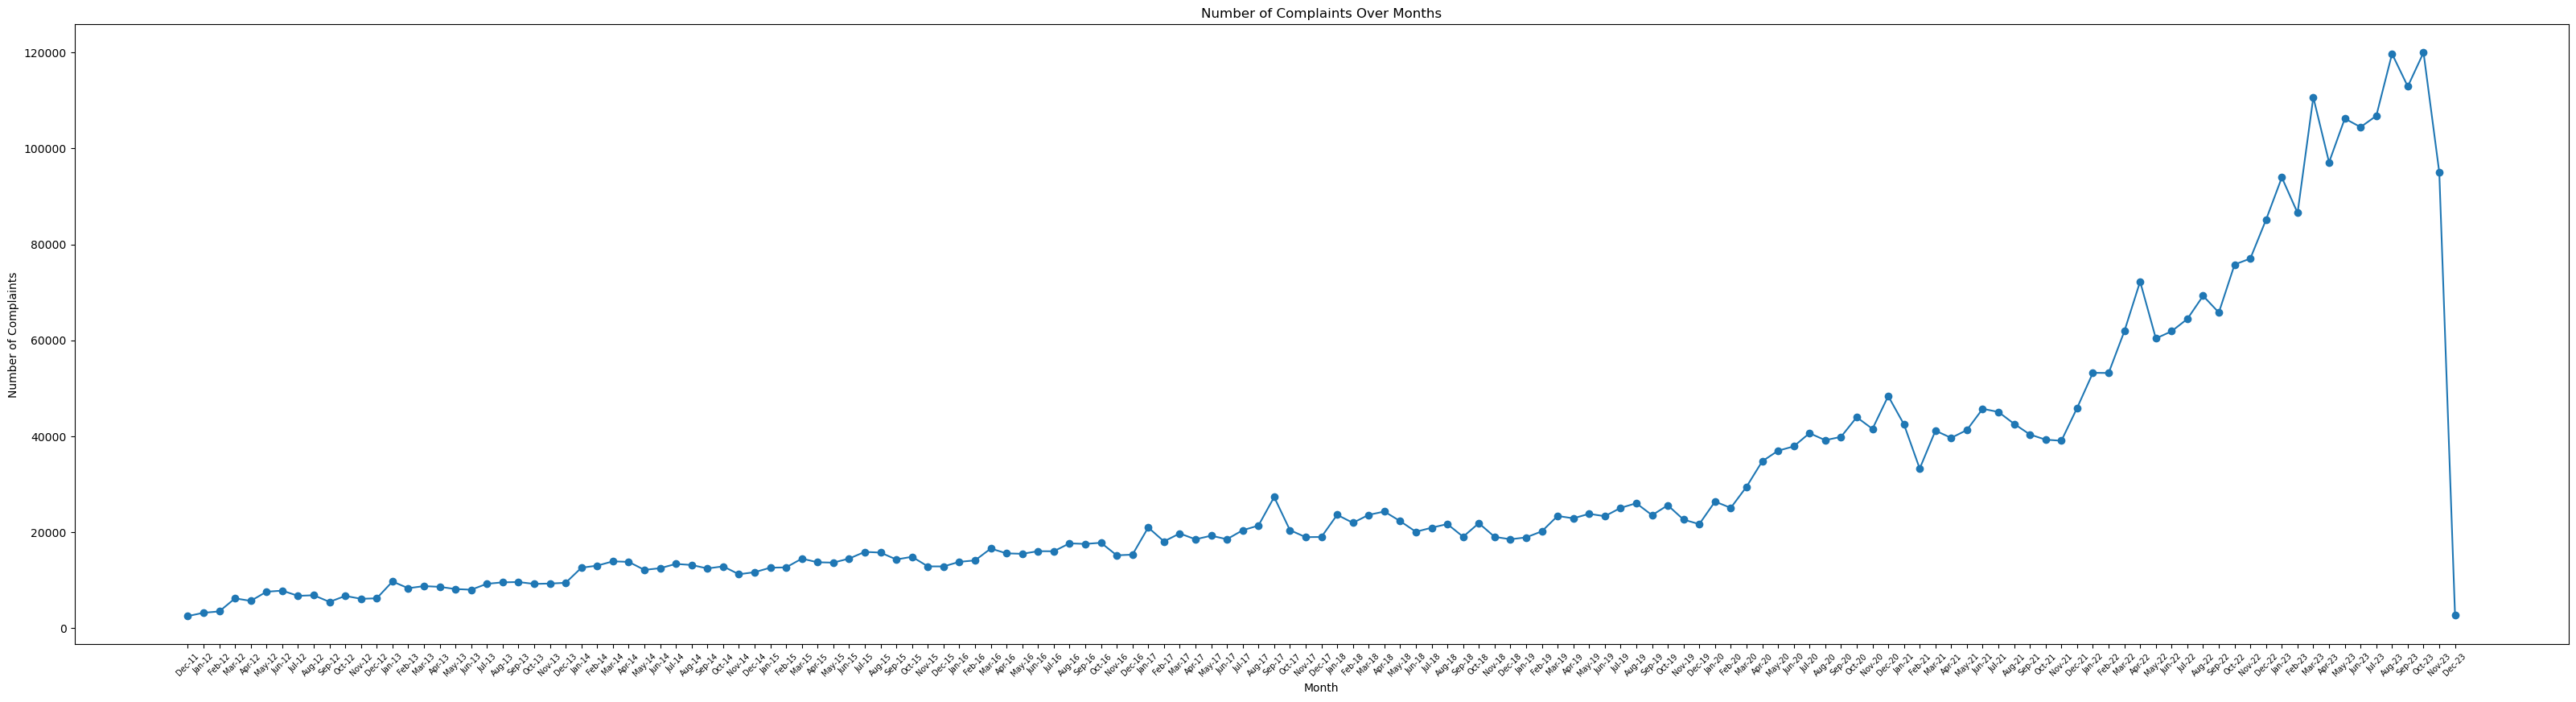

In [27]:

# Plotting the line chart

plt.figure(figsize= (40,10))
plt.plot(df_month_year['Month-Year'], df_month_year['Number_of_complaints'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints Over Months')
plt.xticks(rotation = 45, fontsize = 7)



# Display the plot
plt.show()


The trend analysis indicates a clear upward trajectory in the number of complaints over the months. Notably, there is a significant drop in the number of complaints in Nov-23 compared to the preceding months, warranting further investigation. It's essential to acknowledge that the apparent decline in complaints for Dec-23 may be attributed to incomplete records rather than an actual reduction in issues.

In [28]:
# Creating a new table with Year and Number of complaints

df_by_year = df_by_date.groupby('Year')['Number_of_complaints'].sum().reset_index()

df_by_year


,Year,Number_of_complaints
0,2011,2536
1,2012,72372
2,2013,108215
3,2014,153011
4,2015,168451
5,2016,191434
6,2017,242857
7,2018,257223
8,2019,277299
9,2020,444299


As we have only Dec month complaints for the Year 2011. The records of Year 2011 can be removed for better understanding of data.

In [30]:
# Delete rows where the 'Year' is 2011

df_by_year = df_by_year[df_by_year['Year'] != 2011]

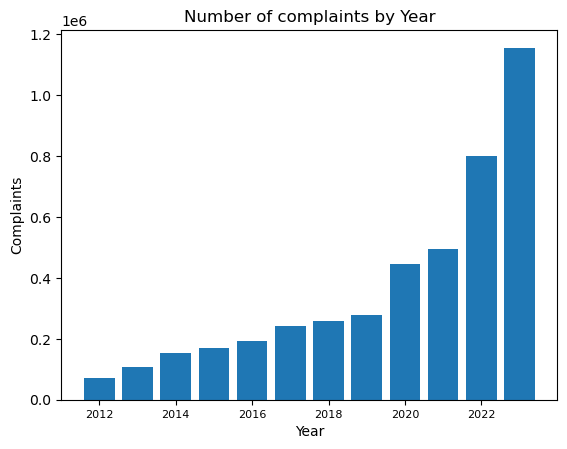

In [31]:
# Creating a Bar Chart

plt.bar(x = df_by_year['Year'], height = df_by_year['Number_of_complaints'] )

plt.xlabel('Year')
plt.ylabel('Complaints')
plt.title('Number of complaints by Year')
plt.xticks(fontsize = 8)

plt.show()

Text(0.5, 1.0, 'Box plot showing outliers by Day')

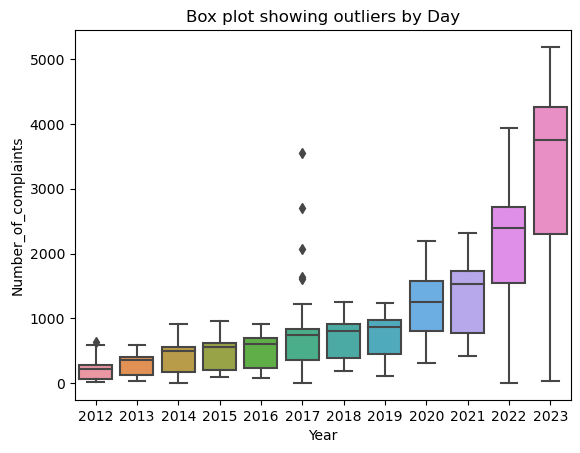

In [32]:
# Creating a box plot highlighting outliers and median for separate years excluding the year 2011

g = sns.boxplot( data = df_by_date[df_by_date['Year'] != 2011],
               x = 'Year',
               y = 'Number_of_complaints',
               showfliers = True);

g.set_title('Box plot showing outliers by Day')

#### Observations:-

- The number of complaints generally shows an increasing trend over the years.
- There is a significant spike in the number of complaints in the years 2020, 2021, 2022, and 2023.
- The year 2023 has the highest number of complaints among the provided years.
- The data indicates a general upward trend in consumer complaints, with fluctuations in some years.
- There are some dates of the year 2017 when the number of complaints are statistically higher that need to be investigated.


## Further investigating outliers in the year 2017

In [33]:
# Filerting out the data_by_date table to create a new table with all the records for year 2017 

df_2017 = df_by_date[df_by_date['Year'] == 2017].reset_index(drop = True)

df_2017.head(10)

,Date,Number_of_complaints,Month,Month_txt,Month-Year,Year,Quarter,Quarter-Year,Day
0,2017-01-01,105,1,Jan,Jan-17,2017,1,2017-Q1,Sun
1,2017-01-02,299,1,Jan,Jan-17,2017,1,2017-Q1,Mon
2,2017-01-03,604,1,Jan,Jan-17,2017,1,2017-Q1,Tue
3,2017-01-04,789,1,Jan,Jan-17,2017,1,2017-Q1,Wed
4,2017-01-05,718,1,Jan,Jan-17,2017,1,2017-Q1,Thu
5,2017-01-06,656,1,Jan,Jan-17,2017,1,2017-Q1,Fri
6,2017-01-07,257,1,Jan,Jan-17,2017,1,2017-Q1,Sat
7,2017-01-08,232,1,Jan,Jan-17,2017,1,2017-Q1,Sun
8,2017-01-09,585,1,Jan,Jan-17,2017,1,2017-Q1,Mon
9,2017-01-10,744,1,Jan,Jan-17,2017,1,2017-Q1,Tue


In [34]:
# Sorting the values by Number_of_complaints with highest number on top

df_2017 = df_2017.sort_values(by = 'Number_of_complaints', ascending = False)

# Showing the first 5 rows 
df_2017.head(5)

,Date,Number_of_complaints,Month,Month_txt,Month-Year,Year,Quarter,Quarter-Year,Day
249,2017-09-08,3551,9,Sep,Sep-17,2017,3,2017-Q3,Fri
250,2017-09-09,2709,9,Sep,Sep-17,2017,3,2017-Q3,Sat
18,2017-01-19,2070,1,Jan,Jan-17,2017,1,2017-Q1,Thu
19,2017-01-20,1633,1,Jan,Jan-17,2017,1,2017-Q1,Fri
254,2017-09-13,1600,9,Sep,Sep-17,2017,3,2017-Q3,Wed


Text(0.5, 1.0, 'Box plot showing outliers by Month(2017)')

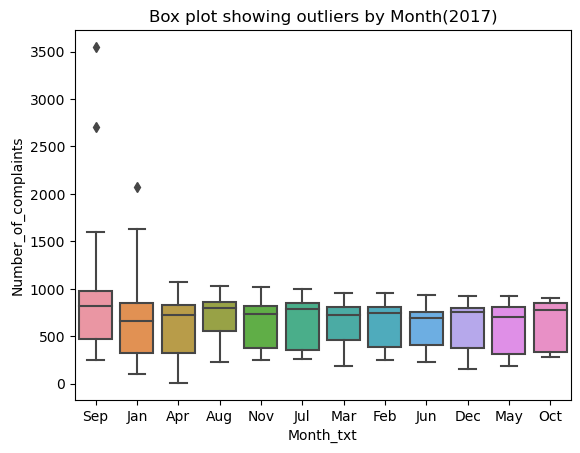

In [35]:
# Creating a box plot highlighting outliers and median for separate Month for the year 2017

box_17_month = sns.boxplot( data = df_2017,
               x = 'Month_txt',
               y = 'Number_of_complaints',
               showfliers = True);

box_17_month.set_title('Box plot showing outliers by Month(2017)')

#### Observations:-


- For Sep-2017, there are two days with number of complaints being statistacically very higher. These two dates are 8th and 9th Sep
- The data also suggest that the number of complaints on 19th Jan is statistically high.
- The factors behind these outliers need to be investigated as it can lead to improve consumer satisfactions.

## Checking if the certain dates in the year 2023 has statistically more number of complaints

In [36]:
# Filerting out the data_by_date table to create a new table with all the records for year 2023

df_2023 = df_by_date[df_by_date['Year'] == 2023].reset_index(drop = True)

df_2023.head(10)

,Date,Number_of_complaints,Month,Month_txt,Month-Year,Year,Quarter,Quarter-Year,Day
0,2023-01-01,1208,1,Jan,Jan-23,2023,1,2023-Q1,Sun
1,2023-01-02,2652,1,Jan,Jan-23,2023,1,2023-Q1,Mon
2,2023-01-03,3379,1,Jan,Jan-23,2023,1,2023-Q1,Tue
3,2023-01-04,3641,1,Jan,Jan-23,2023,1,2023-Q1,Wed
4,2023-01-05,3644,1,Jan,Jan-23,2023,1,2023-Q1,Thu
5,2023-01-06,3413,1,Jan,Jan-23,2023,1,2023-Q1,Fri
6,2023-01-07,2269,1,Jan,Jan-23,2023,1,2023-Q1,Sat
7,2023-01-08,1659,1,Jan,Jan-23,2023,1,2023-Q1,Sun
8,2023-01-09,3403,1,Jan,Jan-23,2023,1,2023-Q1,Mon
9,2023-01-10,3484,1,Jan,Jan-23,2023,1,2023-Q1,Tue


In [37]:
# Removing the Columns which are not necessary for analsis of df_2023 datasets

df_2023.drop(['Month', 'Year', 'Quarter', 'Quarter-Year', 'Month-Year'], axis = 1, inplace = True)

df_2023.head()

,Date,Number_of_complaints,Month_txt,Day
0,2023-01-01,1208,Jan,Sun
1,2023-01-02,2652,Jan,Mon
2,2023-01-03,3379,Jan,Tue
3,2023-01-04,3641,Jan,Wed
4,2023-01-05,3644,Jan,Thu


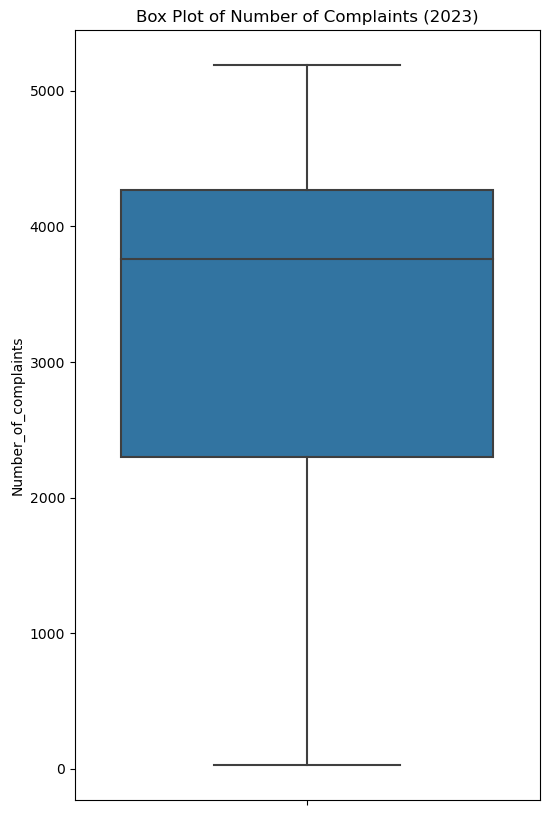

In [43]:
# Plotting a box plot showing outliers and Complaints for all available dates of 2023

plt.figure(figsize=(6, 10))
sns.boxplot(y='Number_of_complaints', data=df_2023, showfliers=True)

# Set plot labels and title
plt.title('Box Plot of Number of Complaints (2023)')

# Show the plot
plt.show()


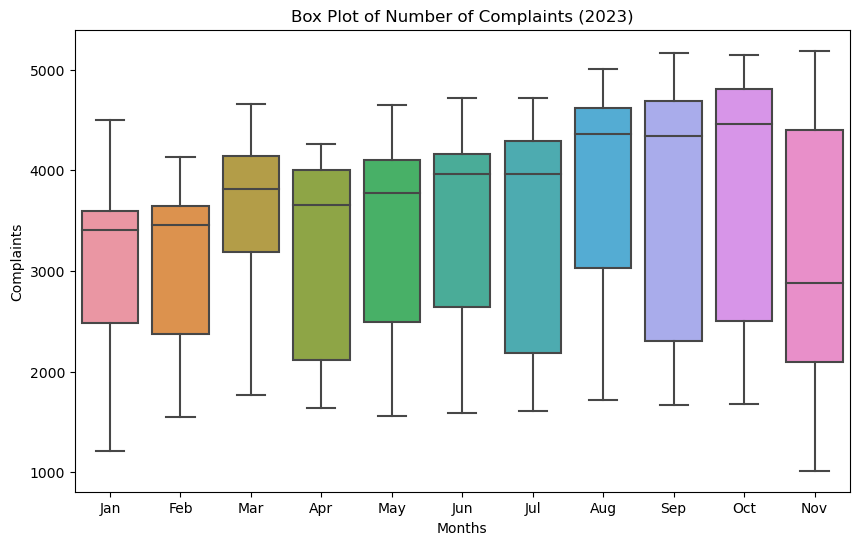

In [44]:
# Plotting a box plot showing outliers and Complaints for all months of 2023 excludinf Dec

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Month_txt', y='Number_of_complaints', data=df_2023[df_2023['Month_txt']!= 'Dec'], showfliers=True)

# Set plot labels and title
plt.xlabel('Months')
plt.ylabel('Complaints')
plt.title('Box Plot of Number of Complaints (2023)')

# Show the plot
plt.show()

The absence of outliers is evident in the data; however, it's notable that the median number of complaints for November has experienced a significant drop. Investigating this decline can contribute to more accurate predictions.

# Conclusions:

- The number of complaints are in uptrend over years. The reasons behind it can be investigated and same practices can be followed in different parts where the Number of complaints are not increasing.

- The downfall in the month of Nov-23 is to be investigated. 

- As clear from the above Analysis that the number of complaints are least during the month of Decemebers. The cause of this fall may be festive season but can be investigaed further.

- For Sep-2017, there are 2 dates when the number of complaints are statistically very high. The reasons causing it has to be investigated.